<a href="https://colab.research.google.com/github/Abhinair26/Mental-Health-in-Tech-Survey/blob/main/Mental_Health_in_Tech_Survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load dataset
df = pd.read_csv("survey.csv")

In [5]:
# --- BASIC SUMMARY ---
print(df.shape)
print(df.columns)
print(df.describe(include='all'))
print(df.isnull().sum())

(1259, 27)
Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')
                  Timestamp           Age Gender        Country state  \
count                  1259  1.259000e+03   1259           1259   744   
unique                 1246           NaN     49             48    45   
top     2014-08-27 12:31:41           NaN   Male  United States    CA   
freq                      2           NaN    615            751   138   
mean                    NaN  7.942815e+07    NaN            NaN   NaN   
std                     NaN  2.818299e+09    

In [6]:
# --- CLEAN GENDER COLUMN ---
df['Gender'] = df['Gender'].str.lower().str.strip()
df['Gender'] = df['Gender'].replace([
    'male-ish', 'maile', 'malr', 'cis male', 'man', 'msle', 'male (cis)', 'make', 'male ', 'm'],
    'male')
df['Gender'] = df['Gender'].replace([
    'cis female', 'femail', 'femake', 'female ', 'woman', 'f'],
    'female')
df['Gender'] = df['Gender'].where(df['Gender'].isin(['male', 'female']), 'other')


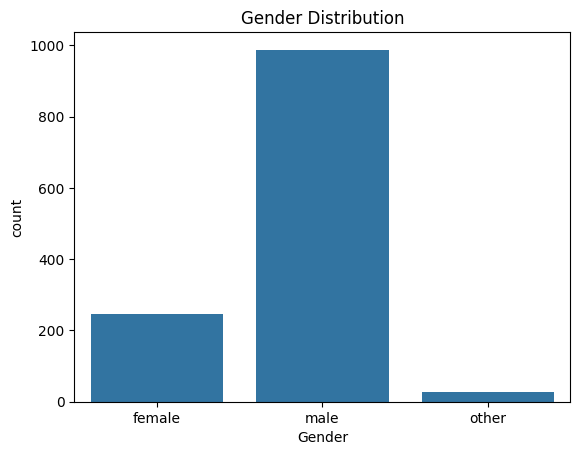

In [7]:
# --- PLOT 1: Gender Distribution ---
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()

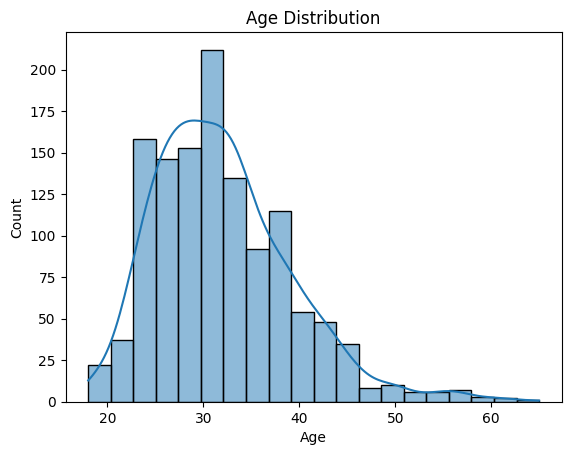

In [8]:
# --- PLOT 2: Age Distribution ---
df = df[df['Age'].between(15, 70)]  # remove outliers
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

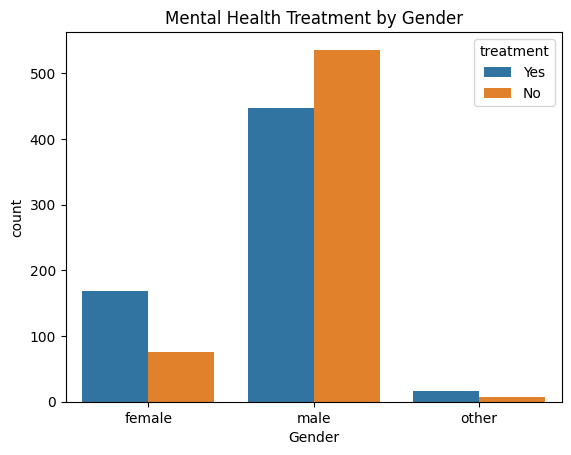

In [9]:
# --- PLOT 3: Mental Health Treatment by Gender ---
sns.countplot(data=df, x='Gender', hue='treatment')
plt.title('Mental Health Treatment by Gender')
plt.show()


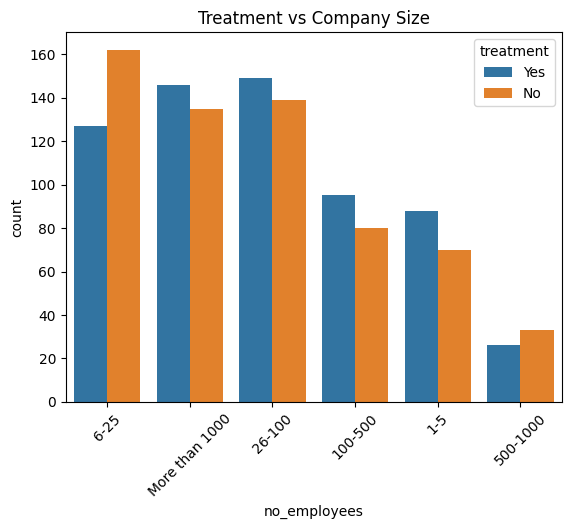

In [10]:
# --- PLOT 4: Treatment by Number of Employees ---
sns.countplot(data=df, x='no_employees', hue='treatment')
plt.title('Treatment vs Company Size')
plt.xticks(rotation=45)
plt.show()

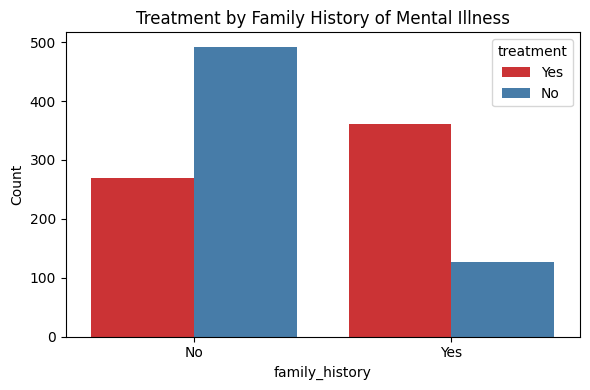

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='family_history', hue='treatment', palette='Set1')
plt.title('Treatment by Family History of Mental Illness')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

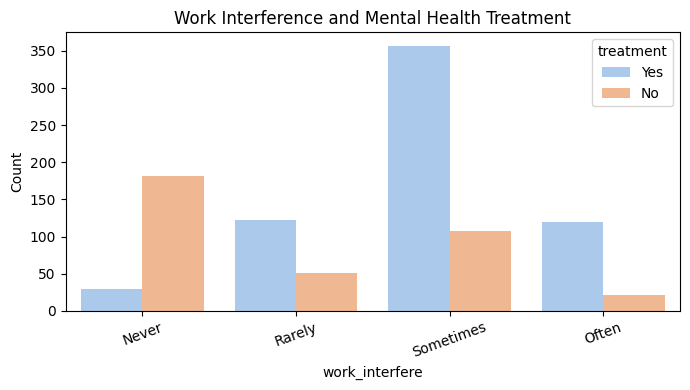

In [12]:
# Plot 6: Work Interference and Mental Health Treatment
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='work_interfere', hue='treatment', palette='pastel',
              order=['Never', 'Rarely', 'Sometimes', 'Often'])
plt.title('Work Interference and Mental Health Treatment')
plt.ylabel('Count')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

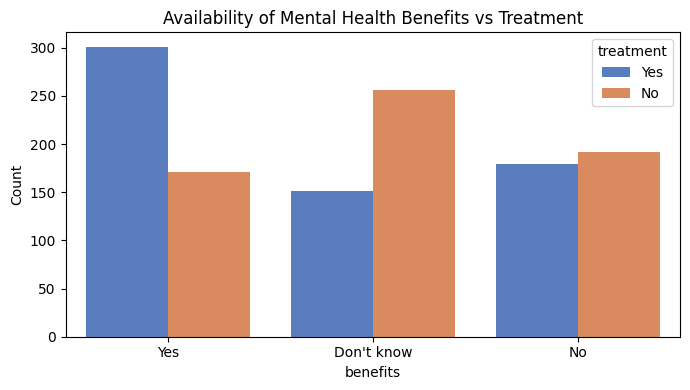

In [13]:
# Plot 7: Availability of Mental Health Benefits vs Treatment
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='benefits', hue='treatment', palette='muted')
plt.title('Availability of Mental Health Benefits vs Treatment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

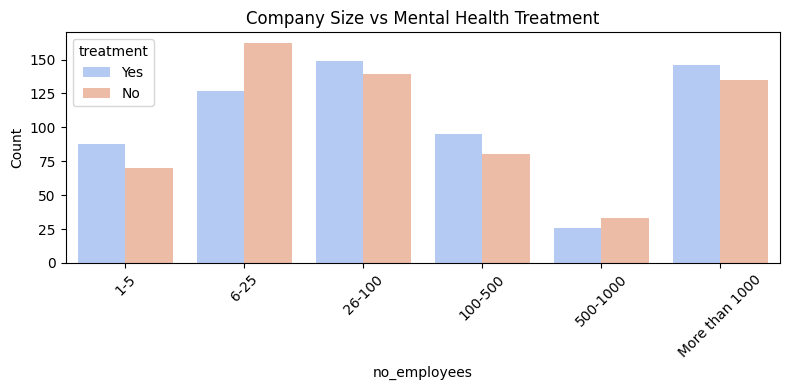

In [14]:
# Plot 8: Company Size vs Mental Health Treatment
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='no_employees', hue='treatment', palette='coolwarm',
              order=['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000'])
plt.title('Company Size vs Mental Health Treatment')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.tight_layout()
plt.show()